# Example 001 - estimate affine transform that maps spatial light modulator to image plane
  
If a spatial light modulator is used to generate patterns, it is possible to create a calibration mapping. This mapping allows for high accuracy estimates of the applied illumination patterns. These estimates remove the need to estimate the pattern frequency and phase, allowing for improved SIM reconstructions.

Here, we use a set of specialized patterns displayed on a digital micromirror device (DMD) and a sample with uniform fluorescence. Specifically, we deposisted of a thin layer of concentrated fluorescent dye between a slide and #1.5 coverslip.   

### Import libraries 

In [1]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import mcsim.analysis.fit_dmd_affine as fit_dmd_affine
import mcsim.analysis.dmd_patterns as dmd
import mcsim.analysis.mm_io as mm_io

### Define metadata for calibration experiment

In [7]:
# filename
filename = Path("data", "affine_calibration.tif")

# channel labels corresponding to excitation laser
# acquired on microscope 
channel_labels = ["465 nm", "635 nm", "532 nm"]

# guesses at center of patterns on camera for each channel
centers_init = [[1039, 918], [982, 976], [1091, 979]]
indices_init = [[10, 16], [9, 16], [10, 15]] #[dmd short axis, dmd long axis]

# region of interest for fitting individual spots
roi_size = 25

# microscope metadata for camera pixel size, DMD pixel size, and expected magnification between DMD and camera
options = {'cam_pix': 6.5e-6,
           'dmd_pix': 7.56e-6,
           'dmd2cam_mag_expected': 180 / 300 * 400 / 200}

# function to return spot size
def sigma_pix(wl1, wl2, na, cam_mag):
    return np.sqrt(wl1**2 + wl2**2) / 2 / na / (2 * np.sqrt(2 * np.log(2))) / (options["cam_pix"] / cam_mag)

### Load patterns that were displayed on DMD

In [9]:
# load DMD pattern and dmd_centers
masks, radii, pattern_centers = dmd.get_affine_fit_pattern([1920, 1080])
mask = masks[1]

### Determine calibration and plot

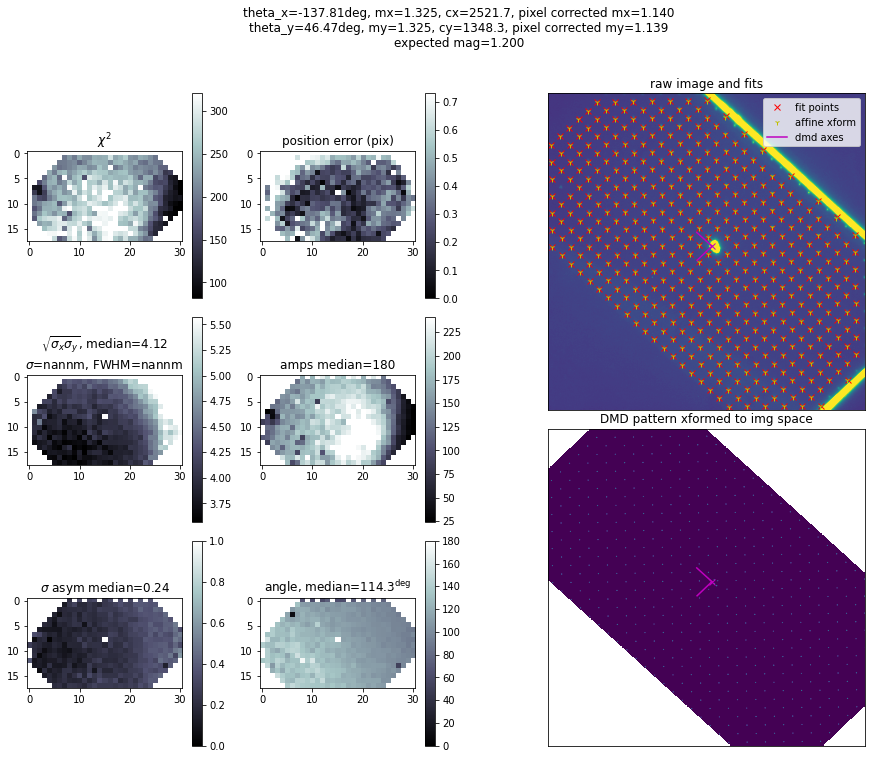

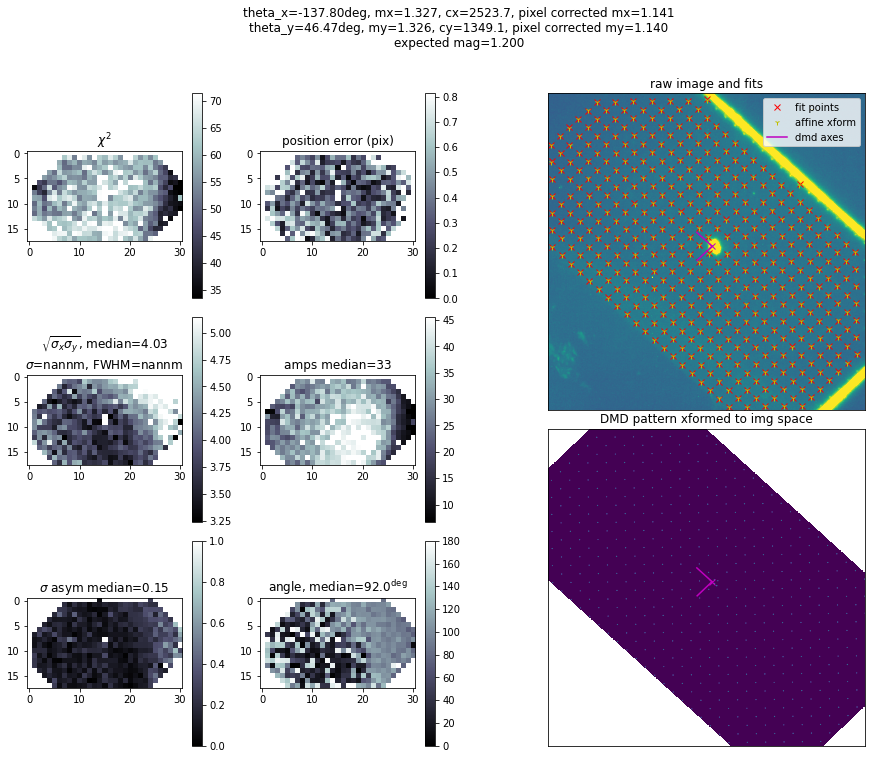

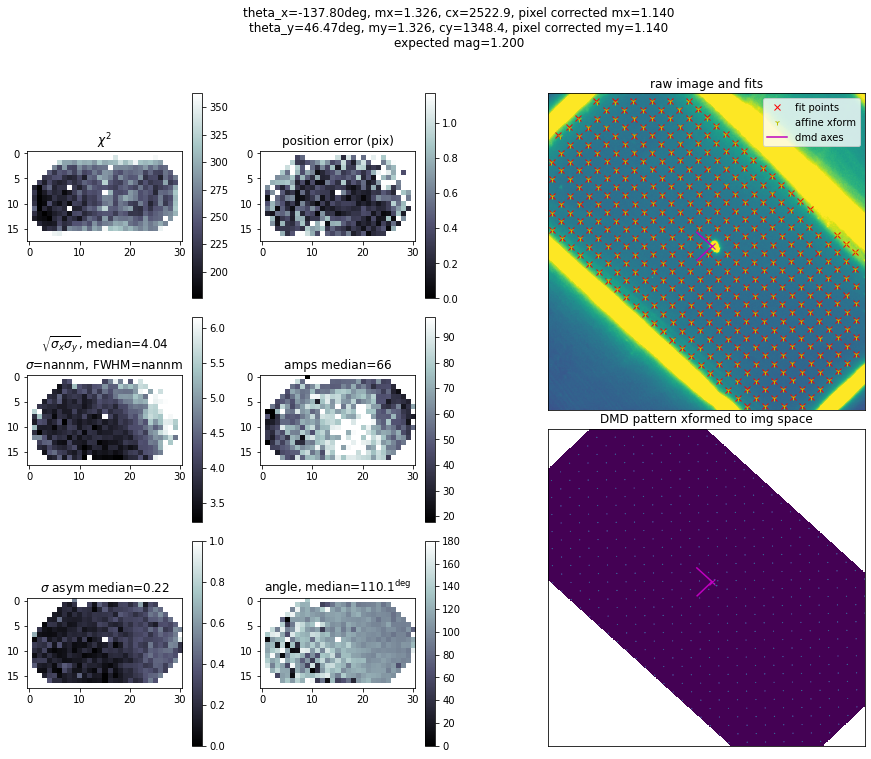

In [11]:
# read imges for each channel
for nc in range(len(channel_labels)):
        img, _ = mm_io.read_tiff(filename, slices=nc)
        img = img[0]
        affine_xform = fit_dmd_affine.estimate_xform(img, mask, pattern_centers, centers_init,
                                                     indices_init, options, roi_size=roi_size,
                                                     export_fname=None,
                                                     export_dir=None, chi_squared_relative_max=3)
plt.show()